# Var paramétrico

A la hora de evaluar la exposición al riesgo, muchas organizaciones han adoptado la métrica del valor en riesgo, o VaR, que es una técnica estadística de gestión del riesgo que mide la pérdida máxima a la que puede enfrentarse una cartera de inversiones en un plazo determinado con un cierto grado de confianza.

Para más información pulsa [aquí](https://www.investopedia.com/ask/answers/041715/what-variancecovariance-matrix-or-parametric-method-value-risk-var.asp#:~:text=The%20parametric%20method%2C%20also%20known,deviation%20of%20an%20investment%20portfolio.)

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

Nos creamos una cartera

In [2]:
symbols = ["AAPL", "META"]      
pesos = np.array([.20,.80])            
tickers = yf.Tickers(symbols)
data = tickers.history(start='2010-10-20',end='2012-10-20').loc[:,'Close'].dropna()
returns = data.pct_change()[1:]

[*********************100%***********************]  2 of 2 completed


In [3]:
returns = data.pct_change()[1:]

In [4]:
returns 


,AAPL,META
Date,,
2012-05-21,0.058260,-0.109861
2012-05-22,-0.007679,-0.089039
2012-05-23,0.024400,0.032258
2012-05-24,-0.009184,0.032187
2012-05-25,-0.005360,-0.033909
...,...,...
2012-10-15,0.008020,0.000000
2012-10-16,0.023678,-0.002049
2012-10-17,-0.007972,0.020534


<AxesSubplot:ylabel='Frequency'>

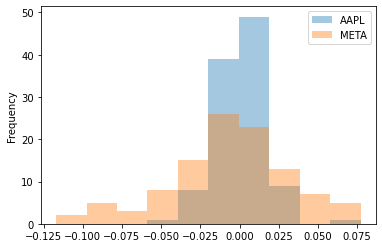

In [5]:
returns.plot.hist(alpha=0.4)

Calculamos la media y la desviación típica de la cartera

In [6]:
returns.mean()

AAPL    0.001457
META   -0.005746
dtype: float64

In [7]:
pesos

array([0.2, 0.8])

In [8]:
returns.mean().dot(pesos)

-0.004305377493835863

In [9]:
returns.cov()

,AAPL,META
AAPL,0.000225,-0.000019
META,-0.000019,0.001518


In [10]:
portfolio_mean = returns.mean().dot(pesos)
portfolio_stdev = np.sqrt(pesos.T.dot(returns.cov()).dot(pesos))

In [11]:
portfolio_mean

-0.004305377493835863

In [12]:
dist = np.random.normal(portfolio_mean, portfolio_stdev, 1000000)

(array([3.14876177e-04, 3.14876177e-04, 3.14876177e-04, 3.14876177e-04,
        0.00000000e+00, 0.00000000e+00, 3.14876177e-04, 9.44628532e-04,
        2.83388560e-03, 1.57438089e-03, 2.20413324e-03, 6.92727590e-03,
        1.03909139e-02, 1.63735612e-02, 2.17264562e-02, 2.83388560e-02,
        4.81760552e-02, 5.98264737e-02, 8.47016917e-02, 1.05168643e-01,
        1.47047175e-01, 2.14115801e-01, 2.72367894e-01, 3.46363795e-01,
        4.93410970e-01, 5.89763080e-01, 8.24030957e-01, 9.96583102e-01,
        1.22108982e+00, 1.55108005e+00, 1.89996286e+00, 2.31308040e+00,
        2.69817396e+00, 3.25393042e+00, 3.86290095e+00, 4.48855991e+00,
        5.20521809e+00, 5.85165888e+00, 6.60484270e+00, 7.42194638e+00,
        8.18709549e+00, 8.90438342e+00, 9.81028219e+00, 1.05127709e+01,
        1.10625447e+01, 1.15827202e+01, 1.20685741e+01, 1.24306817e+01,
        1.26926587e+01, 1.27241463e+01, 1.27109215e+01, 1.26063826e+01,
        1.23324404e+01, 1.18576071e+01, 1.14082788e+01, 1.078702

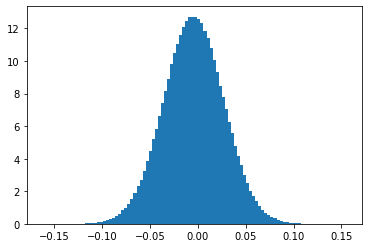

In [13]:
plt.hist(dist, bins=100, density=True)

Calculamos la pérdida por día y el nivel de confianza que queremos.

In [14]:
investment = int(1000000)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev



In [15]:
mean_investment

995694.6225061641

In [16]:
stdev_investment

31215.361289669163

In [17]:
pct_seg = 0.95

conf_level = 1 - pct_seg

In [18]:
conf_level

0.050000000000000044

In [19]:
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

In [20]:
investment - cut

55650.07772774878

In [21]:
investment = int(1)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev

pct_seg = 0.95

conf_level = 1 - pct_seg
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

var_1d = investment - cut 

days = int(23)

print(("\nLa pérdida máxima de tu cartera inicial de " + str(investment) + 
    " usd con un nivel de confianza del " + str((1 - conf_level) * 100) + "% y para los siguientes " + str(days) + " días es de:\n"))

var_array = []

for i in range(1, days+1):
    var_array.append(np.round(var_1d * np.sqrt(i), 2))
    print("A " + str(i) + " días, VaR(" + str((1 - conf_level) * 100) + "%) = " + str(((np.round(var_1d * np.sqrt(i), 2))))+ "   Portfolio : " +str((np.round(investment * (1+portfolio_mean)**(i),2 ))))


La pérdida máxima de tu cartera inicial de 1 usd con un nivel de confianza del 95.0% y para los siguientes 23 días es de:

A 1 días, VaR(95.0%) = 0.06   Portfolio : 1.0
A 2 días, VaR(95.0%) = 0.08   Portfolio : 0.99
A 3 días, VaR(95.0%) = 0.1   Portfolio : 0.99
A 4 días, VaR(95.0%) = 0.11   Portfolio : 0.98
A 5 días, VaR(95.0%) = 0.12   Portfolio : 0.98
A 6 días, VaR(95.0%) = 0.14   Portfolio : 0.97
A 7 días, VaR(95.0%) = 0.15   Portfolio : 0.97
A 8 días, VaR(95.0%) = 0.16   Portfolio : 0.97
A 9 días, VaR(95.0%) = 0.17   Portfolio : 0.96
A 10 días, VaR(95.0%) = 0.18   Portfolio : 0.96
A 11 días, VaR(95.0%) = 0.18   Portfolio : 0.95
A 12 días, VaR(95.0%) = 0.19   Portfolio : 0.95
A 13 días, VaR(95.0%) = 0.2   Portfolio : 0.95
A 14 días, VaR(95.0%) = 0.21   Portfolio : 0.94
A 15 días, VaR(95.0%) = 0.22   Portfolio : 0.94
A 16 días, VaR(95.0%) = 0.22   Portfolio : 0.93
A 17 días, VaR(95.0%) = 0.23   Portfolio : 0.93
A 18 días, VaR(95.0%) = 0.24   Portfolio : 0.93
A 19 días, VaR(95.0%) = 

Mostramos la pérdida máxima con una seguridad del 95%

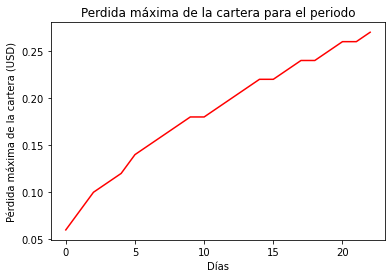

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'META'}>]], dtype=object)

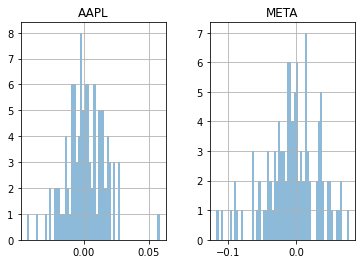

In [22]:
plt.xlabel("Días")
plt.ylabel("Pérdida máxima de la cartera (USD)")
plt.title("Perdida máxima de la cartera para el periodo")
plt.plot(var_array,"r")
plt.show()
returns.hist(bins=60,alpha=0.5)



___ 
# Ejercicios

- Transforma el código anterior en una función con parámetros de entrada:
    - Intervalo de confianza
    - Número de días a futuro
    - Inversión inicial (si no se da se asumen 1000€)

- Usa la función y muestra el var al 75% de una cartera formada por Repsol, Telefónica e Inditex, con el mismo peso.

In [23]:
symbols = ["REP.MC", "TEF.MC","ITX.MC"]      
pesos = np.array([.20,.80])            
tickers = yf.Tickers(symbols)
data = tickers.history(start='2010-10-20',end='2012-10-20').loc[:,'Close'].dropna()
returns = data.pct_change()[1:]

[*********************100%***********************]  3 of 3 completed


In [24]:
returns

,ITX.MC,REP.MC,TEF.MC
Date,,,
2010-10-21,0.029077,0.001530,-0.008251
2010-10-22,-0.004514,-0.001273,0.003900
2010-10-25,0.012764,-0.000255,0.000518
2010-10-26,-0.008126,-0.006119,-0.004660
2010-10-27,-0.009865,-0.002822,-0.005461
...,...,...,...
2012-10-15,-0.006065,0.006451,0.001970
2012-10-16,0.018614,0.044197,0.033923
2012-10-17,0.006396,0.031341,0.032335
